In [4]:
%matplotlib inline
import pandas as pd

In [5]:
cast = pd.read_csv('/content/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015.0,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985.0,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017.0,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015.0,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015.0,$hutter,actor,1988 Opera House Patron,NaN


In [6]:
titles = pd.read_csv('/content/titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [7]:
release_dates = pd.read_csv('/content/release_dates.csv')
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


Using groupby(), plot the number of films that have been released each decade in the history of cinema.

<Axes: xlabel='decade'>

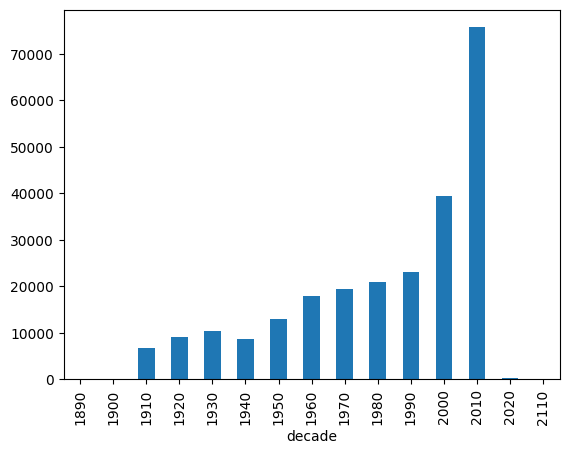

In [8]:
titles['decade'] = titles.year // 10 * 10
titles.groupby('decade').size().plot(kind='bar')

Use groupby() to plot the number of "Hamlet" films made each decade.

<Axes: xlabel='decade'>

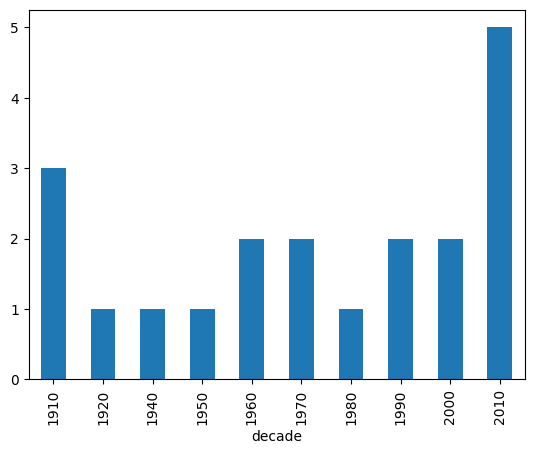

In [9]:
titles[titles.title=='Hamlet'].groupby('decade').size().sort_index().plot(kind='bar')

How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [10]:
cast[(cast.year//10==195)&(cast.n==1)].groupby(['year','type']).type.value_counts()

year    type   type 
1950.0  actor  actor    26
1951.0  actor  actor    31
1952.0  actor  actor    24
1953.0  actor  actor    23
1954.0  actor  actor    20
1955.0  actor  actor    27
1956.0  actor  actor    27
1957.0  actor  actor    32
1958.0  actor  actor    41
1959.0  actor  actor    41
Name: type, dtype: int64

In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [11]:
cast[(cast.year//10==195)&(cast.n<=5)].groupby(['n','type']).type.value_counts()

n    type   type 
1.0  actor  actor    292
2.0  actor  actor    144
3.0  actor  actor    181
4.0  actor  actor    234
5.0  actor  actor    220
Name: type, dtype: int64

Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [12]:
cast[cast.title.str.contains('Pink Panther')].groupby('year').size()

year
1975.0    3
1978.0    4
1982.0    1
1983.0    2
1993.0    1
2006.0    4
2009.0    1
dtype: int64

List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [14]:
cast[cast.name=='Frank Oz'].groupby(['title','year']).size()>1

Series([], dtype: bool)

List each of the characters that Frank Oz has portrayed at least twice.

In [15]:
cast[cast.name=='Frank Oz'].groupby('character').size()>2

Series([], dtype: bool)